# Dense Autoencoder

We shall begin with the exploration of a shallow fully connected autoencoder on the Fashion-MNIST dataset. The encoding dimension will be 32 while the image dimension is 784, meaning a compression factor of 24.5

In [1]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [0]:
encoded_dim = 32
input_img = Input(shape=(784,))

# Encoding layer
encode = Dense(encoded_dim, activation='relu')(input_img)

# Decoding layer
decode = Dense(784, activation='sigmoid')(encode)

In [0]:
# Model 1: Maps input image to encoded representation
encoder = Model(input_img, encode)

# Model 2: Maps input image to its reconstruction
encode_decode = Model(input_img, decode)

# Model 3: Maps encoded representation to image
encoded_input = Input(shape=(encoded_dim,))
decoder_layer = encode_decode.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
# Compile model
encode_decode.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
# Reshape images to 784 pixels and stack them
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
# Train model with training images as both input and output
# Use test images as validation dataset
encode_decode.fit(x_train, x_train,
                  epochs=50,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test),
                  verbose=0)

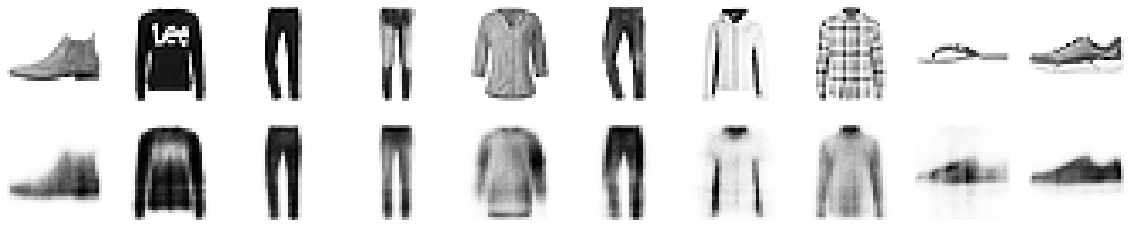

In [8]:
# Let's use the autoencoder on some of the test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Now we can take a look
plt.figure(figsize=(20, 4))
for i in range(10):
  
    # display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()